In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

##### **Vehicle Details**: Includes specific information about each vehicle, such as its make, model, trim, and manufacturing year.

##### **Transaction Information**: Provides insights into the sales transactions, including selling prices and sale dates.

##### **Market Trends**: MMR values offer an estimate of the market value of each vehicle, allowing for analysis of market trends and fluctuations.

##### **Condition and Mileage**: Contains data on the condition of the vehicles as well as their odometer readings, enabling analysis of how these factors influence selling prices.

### 1. **Top 10 seller in US**

### 2. **Each manufacturer sells situation?**

### 3. **Which body sells the most?**

### 4. **Each manufacturer best selling body**

### 5. **For each manufacturer, what is the best-selling combination of model and trim?**

### 6. **Which color sells the best?**

### 7. **Did car more lastest get better price**

### 8. **The condition correlation with car price**

### 9. Can machine learning be used to predict the possible selling price?

In [3]:
data = pd.read_csv('car_prices.csv')

In [4]:
#from ydata_profiling import ProfileReport
#profile = ProfileReport(data, title='Vehicle Profile')
#profile.to_file('Vehicle_report.html')

In [5]:
print('Shape:', data.shape)
print('Columns: ', data.columns)

Shape: (558837, 16)
Columns:  Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')


##### columns: 年份、製造商、型號、裝飾、車身型別、傳輸型別、VIN（車輛識別號）、註冊狀態、狀態評級、里程錶讀數、外部和內部顏色、賣家資訊、曼海姆市場報告（MMR）價值、銷售價格和銷售日期

In [6]:
data.head(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)


In [7]:
# Take a look at data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [8]:
print('Null percentage:\n',(data.isnull().sum()/data.shape[0])*100)

Null percentage:
 year             0.000000
make             1.843292
model            1.860829
trim             1.905922
body             2.361154
transmission    11.694287
vin              0.000716
state            0.000000
condition        2.115107
odometer         0.016821
color            0.134028
interior         0.134028
seller           0.000000
mmr              0.006800
sellingprice     0.002147
saledate         0.002147
dtype: float64


##### transmission have a lot of missing value, since transmission and VIN didn't have a lot of value. I will drop the column

In [9]:
df = data.drop(columns=['transmission', 'vin'])

In [10]:
dd = df[['make', 'model','trim','body']]

null_df = df[dd.isnull().all(axis=1)]

In [11]:
columns_to_check = ['make', 'model', 'trim', 'body']

null_counts = df[columns_to_check].isnull().sum(axis=1)

df = df[null_counts < 2]

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(548186, 14)

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,548186.0,2010.118648,3.905996,1989.0,2008.0,2012.0,2013.0,2015.0
condition,536525.0,30.780146,13.376464,1.0,24.0,35.0,42.0,49.0
odometer,548098.0,67501.283827,52891.915896,1.0,28119.0,51365.0,97877.0,999999.0
mmr,548148.0,13862.332071,9656.552814,25.0,7275.0,12350.0,18400.0,182000.0
sellingprice,548174.0,13702.852660,9728.737708,1.0,7000.0,12200.0,18300.0,230000.0


In [15]:
df.describe(include=object).T

,count,unique,top,freq
make,548186,94,Ford,93554
model,548088,950,Altima,19349
trim,548186,1963,Base,55817
body,545642,87,Sedan,199437
state,548186,64,fl,81426
color,547452,46,black,109072
interior,547452,17,black,240798
seller,548186,14071,nissan-infiniti lt,19693
saledate,548174,3736,Tue Feb 10 2015 01:30:00 GMT-0800 (PST),5233


##### Sellingprice minimum is 1 seem strange, let take a look at it

In [16]:
df.sort_values(by = 'sellingprice').head(5)

,year,make,model,trim,body,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
7566,2002,Ford,F-350 Super Duty,XLT,Crew Cab,ca,2.0,NaN,white,gray,laa leasing,7850.0,1.0,Thu Feb 05 2015 04:00:00 GMT-0800 (PST)
293223,2014,Ford,E-Series Van,E-250,E-Series Van,tx,41.0,31886.0,white,gray,u-haul,20800.0,1.0,Thu Feb 12 2015 03:00:00 GMT-0800 (PST)
348252,1995,Isuzu,Rodeo,LS,SUV,va,1.0,254132.0,red,gray,automotive remarketing inc,375.0,1.0,Wed Mar 04 2015 01:05:00 GMT-0800 (PST)
48453,2003,Mercedes-Benz,E-Class,E500,Sedan,ga,21.0,1.0,black,black,peoples credit company inc,7325.0,1.0,Tue Jan 06 2015 09:30:00 GMT-0800 (PST)
530434,2002,Ford,Escort,ZX2 Deluxe,coupe,pa,19.0,164660.0,silver,gray,hertz remarketing,725.0,100.0,Fri Jun 12 2015 02:00:00 GMT-0700 (PDT)


##### 1 dollar sellingprice seem like outlier, so I will remove it

In [17]:
df = df.loc[df['sellingprice'] != 1]

In [18]:
print('Null percentage:\n',(df.isnull().sum()/df.shape[0])*100)

Null percentage:
 year            0.000000
make            0.000000
model           0.017877
trim            0.000000
body            0.464079
state           0.000000
condition       2.127213
odometer        0.015871
color           0.133897
interior        0.133897
seller          0.000000
mmr             0.006932
sellingprice    0.002189
saledate        0.002189
dtype: float64


## Data Null value preprocessing 

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tqdm import tqdm, trange

##### Some data have different Upper or lower alpha

In [20]:
df['body'] = df['body'].apply(lambda x: str(x).lower() if pd.notnull(x) else x)
df['make'] = df['make'].apply(lambda x: str(x).lower() if pd.notnull(x) else x)
df['trim'] = df['trim'].apply(lambda x: str(x).lower() if pd.notnull(x) else x)

In [21]:
def deal_missing_value(d):

    d[['condition', 'odometer']] = d[['condition', 'odometer']].apply(lambda x: x.fillna(x.mean()).astype(int))
    d[['color', 'interior']] = d[['color', 'interior']].apply(lambda x: x.fillna(x.mode().iloc[0]))

    for i in tqdm(range(4)):
        one_encode = OneHotEncoder(handle_unknown='ignore')
        encoder = LabelEncoder()

        features_list = ['make','trim','body','model']
        pop_feature = features_list.pop(i)

        df_notnull = d.dropna(subset=[pop_feature])
        df_null = d[d[pop_feature].isnull()]

        X = one_encode.fit_transform(df_notnull[features_list])
        y = encoder.fit_transform(df_notnull[[pop_feature]])

        clf = RandomForestClassifier()
        clf.fit(X, y)

        if not df_null.empty:
            predicted_make = clf.predict(one_encode.transform(df_null[features_list]))

            predicted_make_labels = encoder.inverse_transform(predicted_make)

            d.loc[d[pop_feature].isnull(), pop_feature] = predicted_make_labels
            
        else:
            None
    return d.dropna()

In [22]:
df[df[columns_to_check].isnull().any(axis=1)]

,year,make,model,trim,body,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
72,2014,bmw,NaN,750li,sedan,ca,43.0,12172.0,black,black,financial services remarketing (lease),67000.0,66000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
468,2013,lincoln,mkt,awd v6,NaN,ca,41.0,74874.0,black,black,remarketing by ge/manheim southern california,19300.0,17750.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
743,2012,bmw,750i,xdr 750i xdriv,NaN,ca,4.0,50790.0,gray,black,financial services remarketing (lease),33900.0,33500.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
770,2012,bmw,750li,750li,NaN,ca,37.0,31762.0,black,black,financial services remarketing (lease),45000.0,45000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
793,2012,bmw,750i,750i,NaN,ca,49.0,53016.0,white,gray,financial services remarketing (lease),31300.0,34250.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546744,2014,bmw,NaN,750li xdrive,sedan,oh,38.0,7394.0,black,black,bmw north america raa,60000.0,56000.0,Tue Jun 16 2015 07:00:00 GMT-0700 (PDT)
549010,2014,bmw,NaN,750li xdrive,sedan,oh,44.0,943.0,blue,tan,bmw north america greer,64000.0,64500.0,Tue Jun 16 2015 07:00:00 GMT-0700 (PDT)
549011,2014,bmw,NaN,750li,sedan,oh,4.0,12895.0,white,black,bmw north america greer,55200.0,57500.0,Tue Jun 16 2015 07:00:00 GMT-0700 (PDT)
552124,2015,audi,NaN,2.0 tfsi premium quattro,sedan,tx,35.0,4529.0,gray,black,tdaf remarketing,26500.0,27000.0,Wed Jun 17 2015 03:15:00 GMT-0700 (PDT)


In [23]:
df = deal_missing_value(df)

100%|██████████| 4/4 [02:59<00:00, 44.90s/it]


#### Split the sale_date into year, month, date, day

In [12]:
def split_salesdate(d):
    d['sale_Day'] = d['saledate'].astype(str).str.split(' ', expand = True)[0]
    d['sale_Date'] = d['saledate'].astype(str).str.split(' ', expand = True)[2].astype(int)
    d['sale_Month'] = d['saledate'].astype(str).str.split(' ', expand = True)[1]
    d['sale_year'] = d['saledate'].astype(str).str.split(' ', expand = True)[3].astype(int)
    d['sale_time'] = d['saledate'].astype(str).str.split(' ', expand=True)[4]
    return d


In [16]:
sale_df = split_salesdate(null_df[~null_df['saledate'].isnull()])

In [29]:
# split the data saledate 
df = split_salesdate(df)
df.drop(columns = ['saledate'], inplace = True)

In [30]:
df.head(3)

,year,make,model,trim,body,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_Day,sale_Date,sale_Month,sale_year,sale_time
0,2015,kia,Sorento,lx,suv,ca,5,16639,white,black,kia motors america inc,20500.0,21500.0,Tue,16,Dec,2014,12:30:00
1,2015,kia,Sorento,lx,suv,ca,5,9393,white,beige,kia motors america inc,20800.0,21500.0,Tue,16,Dec,2014,12:30:00
2,2014,bmw,3 Series,328i sulev,sedan,ca,45,1331,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu,15,Jan,2015,04:30:00


### **Data Analysis**

In [ ]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs
import plotly.express as px
init_notebook_mode(connected = True)
cf.go_offline()

#### 1. **Let see the Top 10 seller in US**

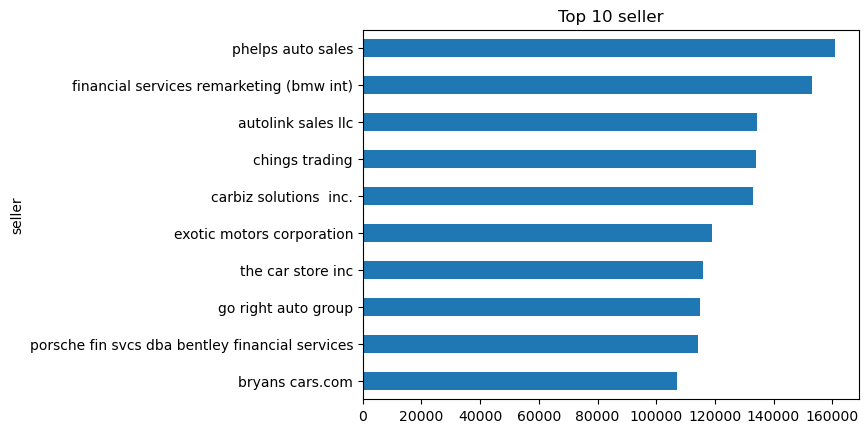

In [ ]:
df.groupby('seller')['sellingprice'].mean().nlargest(10).sort_values().plot(kind = 'barh')
plt.title("Top 10 seller")
plt.show()

#### 2. **Each manufacturer sells situation?**

In [ ]:
df['make'].value_counts().iplot(kind = 'bar', title = 'Each manufacturer sales count')

##### Ford is most popular in US then is Chevrolet

#### 3. **Which body sells the most?**

In [ ]:
df['body'].value_counts().head(10).iplot(kind = 'bar', title = 'Top 10 sales of car body')

##### Sedan and SUV is popular in US

#### 4. **Each manufacturer best selling body**

In [ ]:
group_data = df[['make', 'body']].groupby('make').value_counts().reset_index()
y = pd.DataFrame({'make':[], 'body':[], 0:[]})
for i in df['make'].unique():
    y = y.append(group_data[group_data['make'] == i].sort_values(by = 0, ascending = False).head(1))
y.groupby(['make', 'body']).sum().sort_values(by = 0, ascending=False).iplot(kind = 'bar', title = 'best-selling body of each manufacturer')


##### Ford best selling body is SUV and most of manufaturer sold sedan the best

#### 5. **For each manufacturer, what is the best-selling combination of model and trim?**

In [ ]:
group_data = df[['make', 'model', 'trim']].groupby('make').value_counts().reset_index()
y = pd.DataFrame({'make':[], 'model':[], 'trim':[], 0:[]})
for i in df['make'].unique():
    y = y.append(group_data[group_data['make'] == i].sort_values(by = 0, ascending = False).head(1))
y.groupby(['make', 'model', 'trim']).sum().sort_values(by = 0, ascending=False).iplot(kind = 'bar', title = 'For each manufacturer the best-selling of model and trim')

##### Ford: Fusion SE, Nissan: Altima 2.5S, Toyata: Carmry LE

#### 6. **Which color sells the best?**

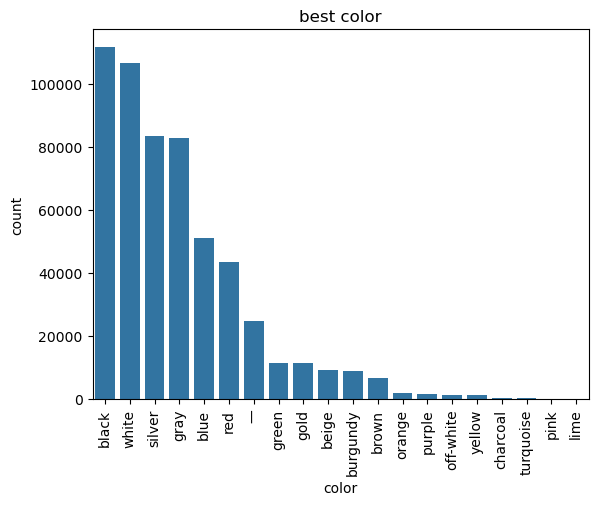

In [ ]:
sns.countplot(df, x = 'color', order=df['color'].value_counts().sort_values(ascending=False).index)
plt.xticks(rotation = 90)
plt.title('best color')
plt.show()

##### Most people buy black and white most then is silver and gray

#### 7. **Did car more lastest get better price**

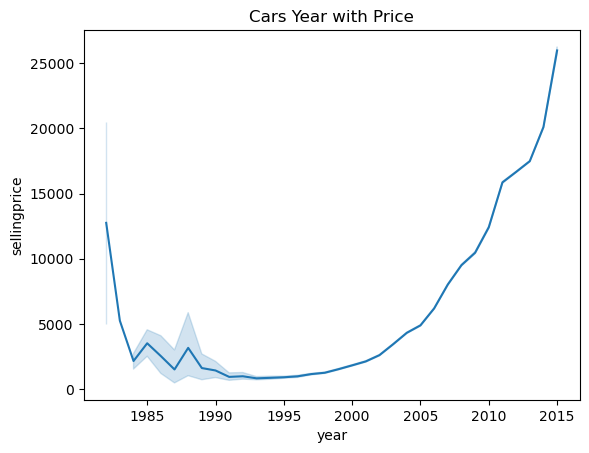

In [ ]:
sns.lineplot(df, x = 'year', y = 'sellingprice')
plt.title('Cars Year with Price')
plt.show()

##### Seem obviously that the car built more recently the higher the price

#### 8. **The condition correlation with car price**

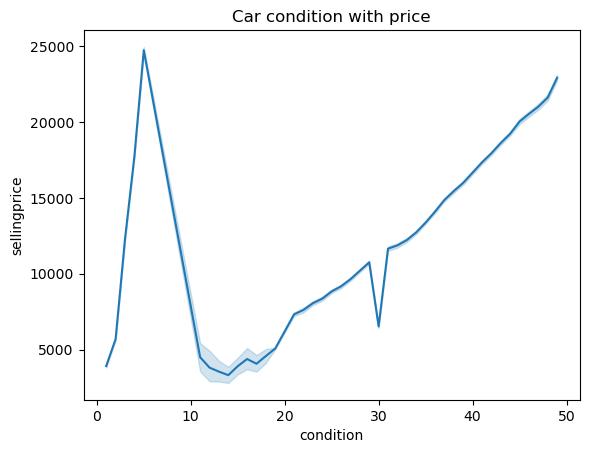

In [ ]:
sns.lineplot(df, x = 'condition', y = 'sellingprice')
plt.title('Car condition with price')
plt.show()

##### Seem like when condition > 10 the price got higher with condition 

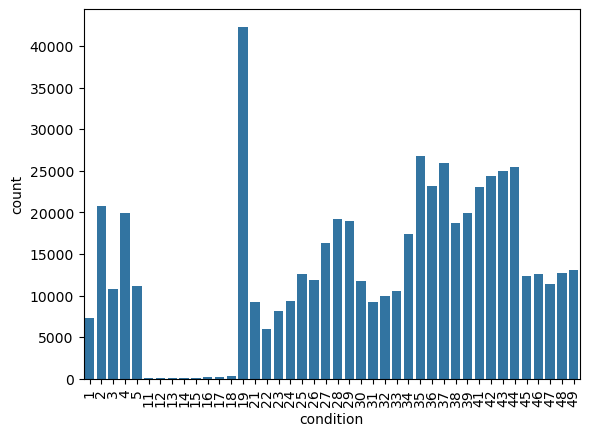

In [ ]:
sns.countplot(df, x = 'condition')
plt.xticks(rotation = 90)
plt.show()

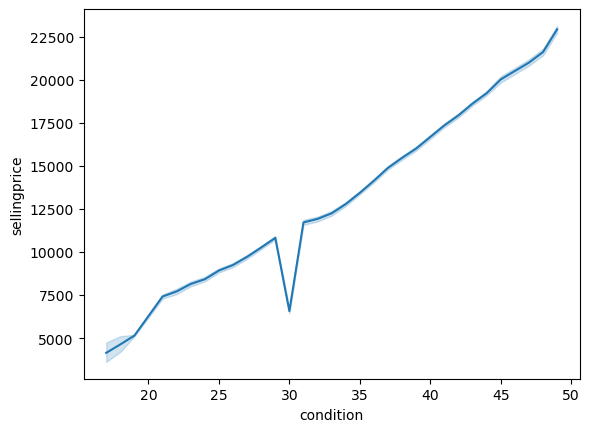

In [ ]:
dg = df[df['condition']>=17]
sns.lineplot(dg, x = 'condition', y = 'sellingprice')
plt.show()

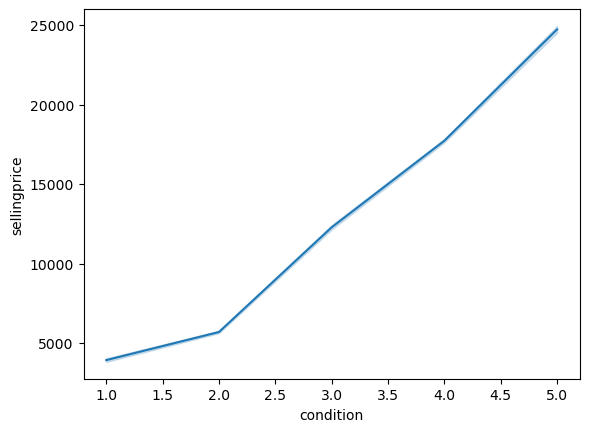

In [ ]:
dg = df[df['condition']<=10]
sns.lineplot(dg, x = 'condition', y = 'sellingprice')
plt.show()

#### **Let see Date**

In [ ]:
df.head(3)

,year,make,model,trim,body,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_Day,sale_Date,sale_Month,sale_year,sale_time
0,2015,Kia,Sorento,LX,suv,ca,5,16639,white,black,kia motors america inc,20500.0,21500.0,Tue,16,Dec,2014,12:30:00
1,2015,Kia,Sorento,LX,suv,ca,5,9393,white,beige,kia motors america inc,20800.0,21500.0,Tue,16,Dec,2014,12:30:00
2,2014,BMW,3 Series,328i SULEV,sedan,ca,45,1331,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu,15,Jan,2015,04:30:00


In [ ]:
sale_month_counts =  df['sale_Month'].value_counts()
desired_month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Filter and reorder month labels based on list
plot_month_labels = [month for month in desired_month_order if month in sale_month_counts.index]
plot_month_counts = sale_month_counts[plot_month_labels]  # Reordered Series

plot_month_counts.iplot(kind='line', color='blue', title='Each Month Sales Count')

##### **Feb, Jan** sold the most car and **Apr, Jul** sold less

#### Let see some features correlation with sellingprice

In [72]:
def plot_box(feature):
    plt.figure(figsize = (15,8))
    sns.boxplot(df, x = feature, y = 'sellingprice')
    plt.xticks(rotation = 90)
    plt.title(feature)
    plt.show()

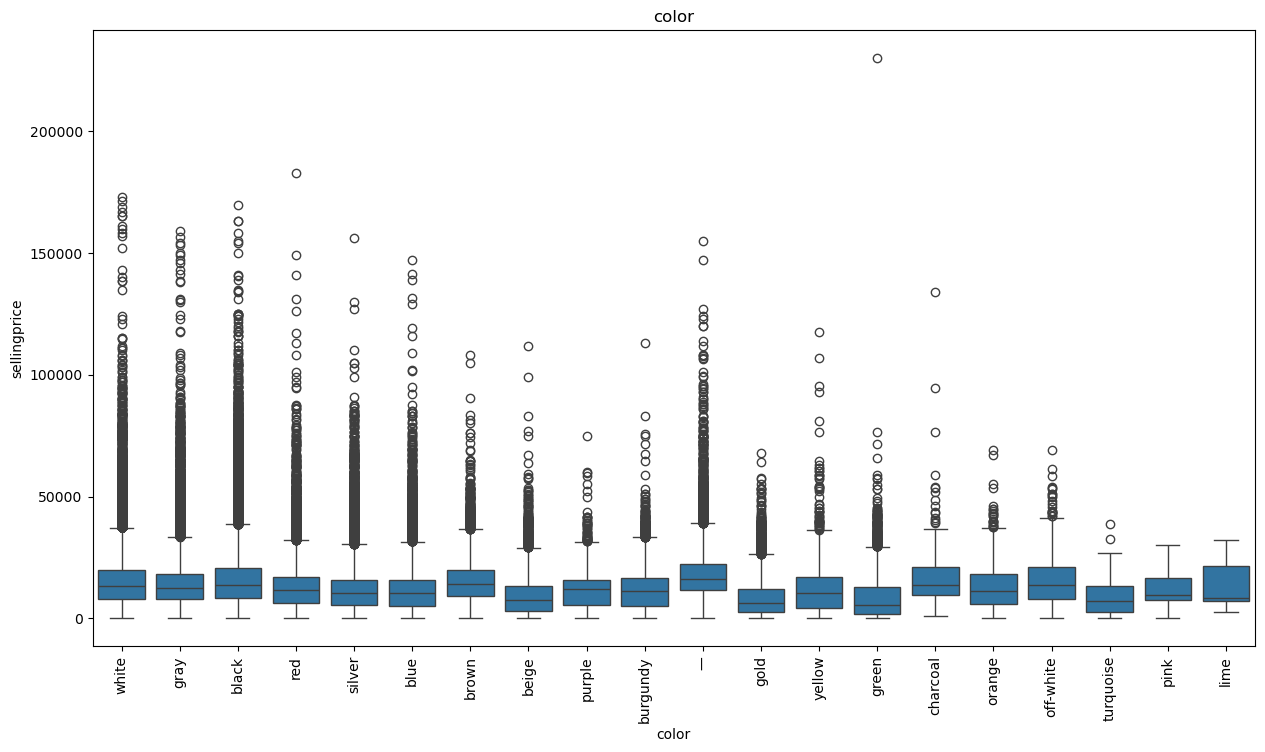

In [ ]:
plot_box('color')

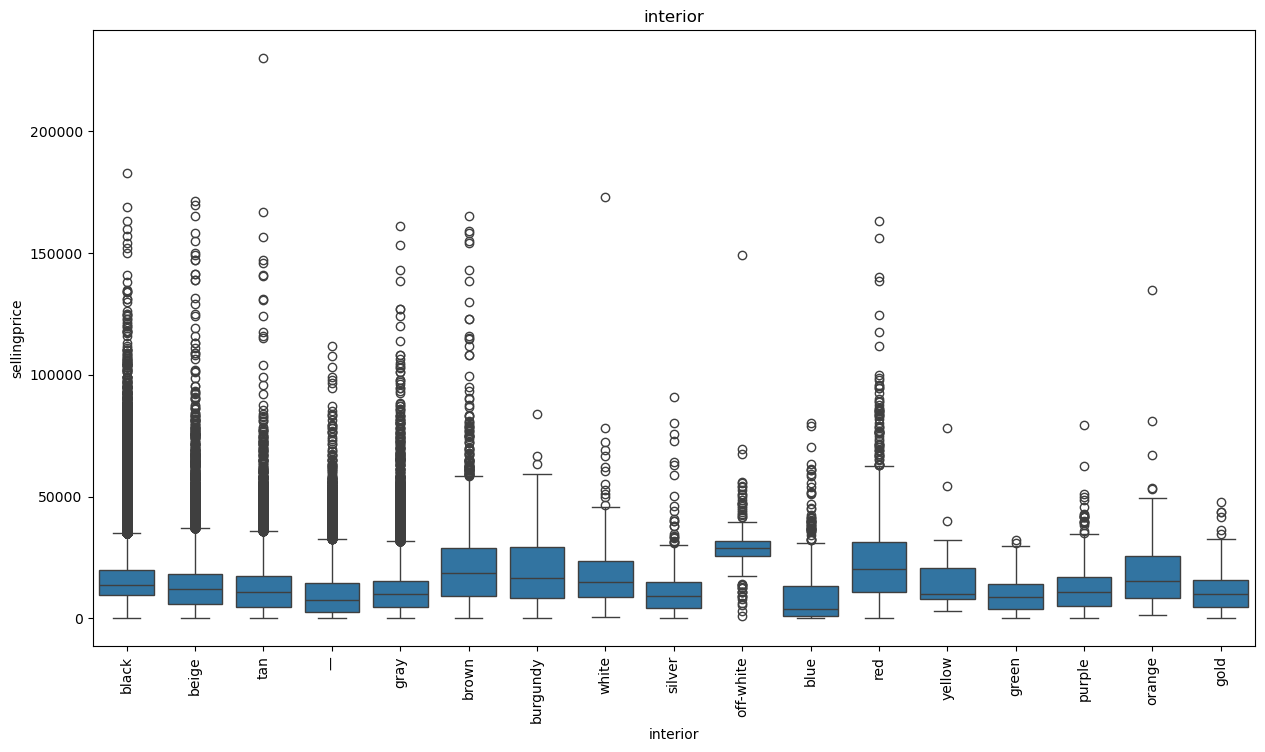

In [ ]:
plot_box('interior')

#### Seem like color does not affect price a lot

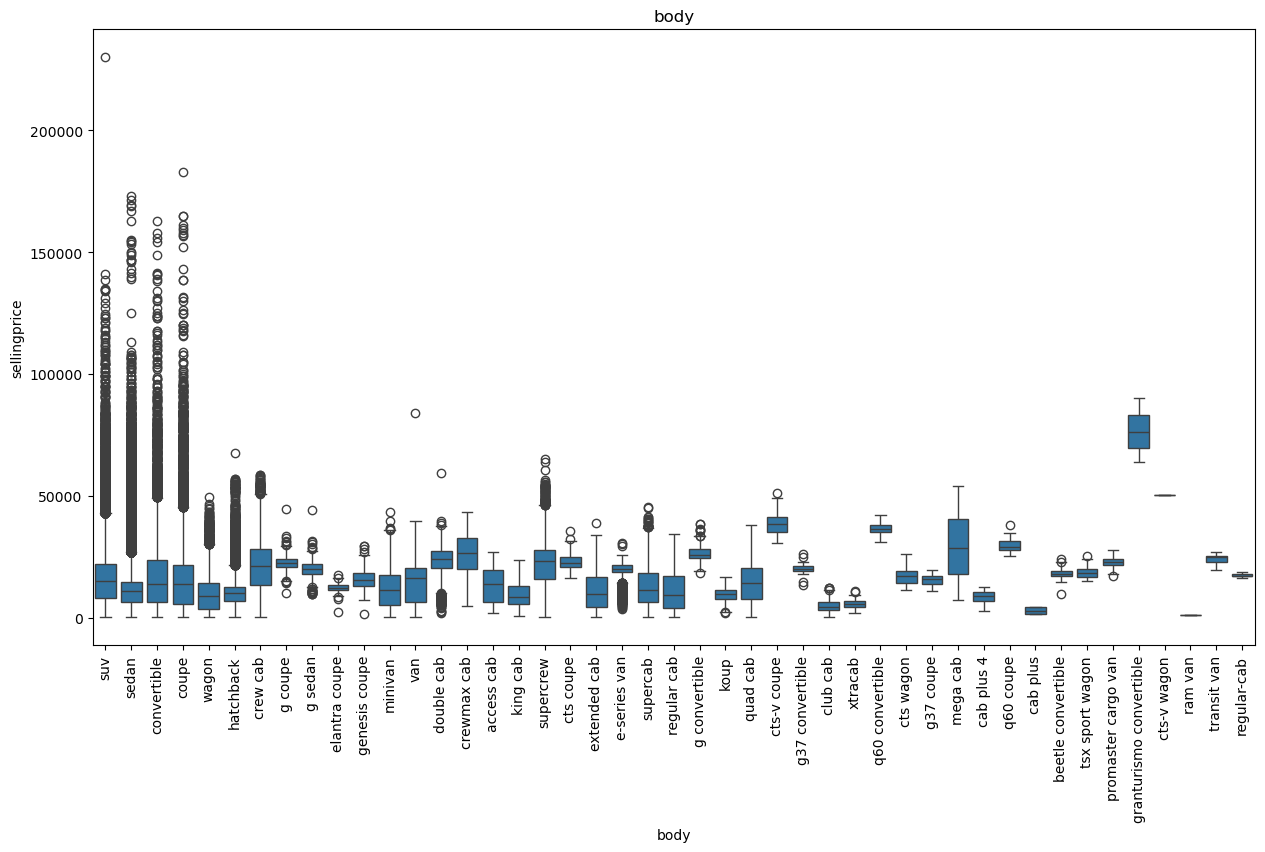

In [ ]:
plot_box('body')

##### body have some affect on price

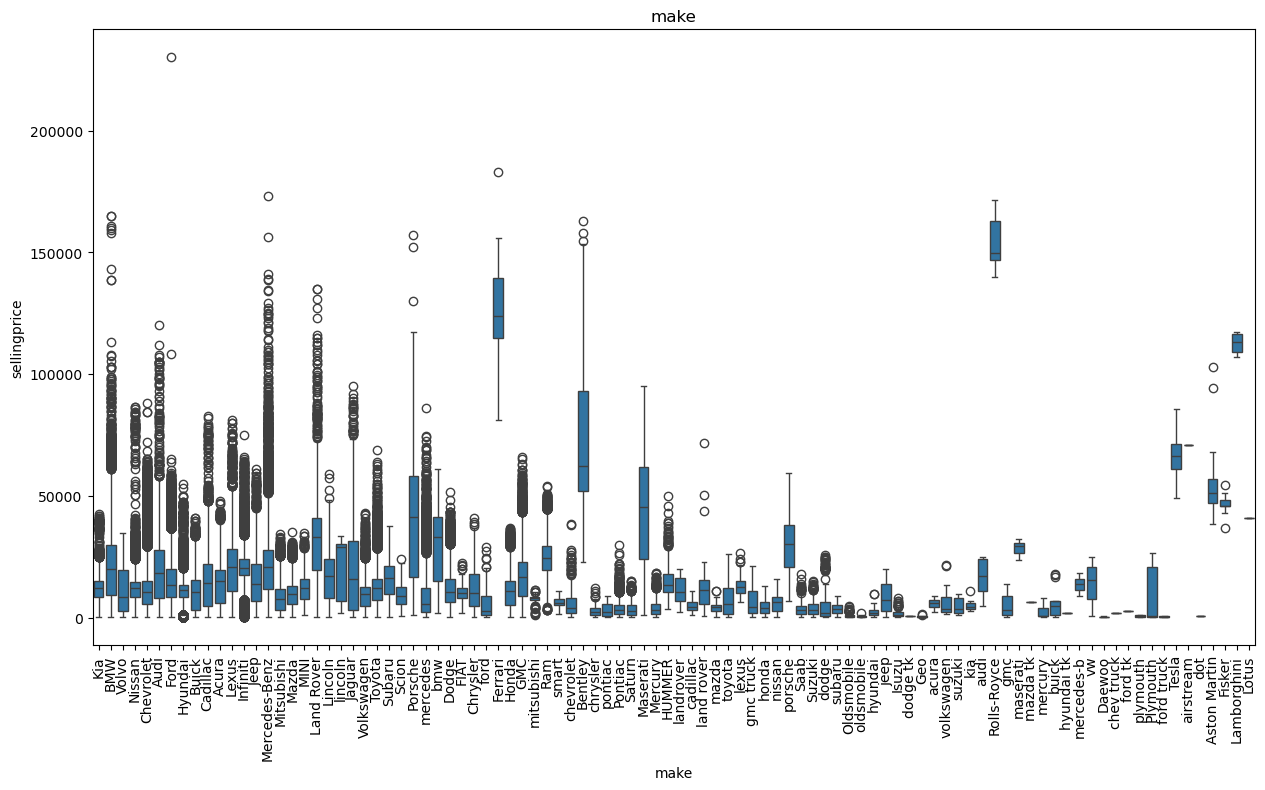

In [ ]:
plot_box('make')

#### feature 'make' have some correlation with price

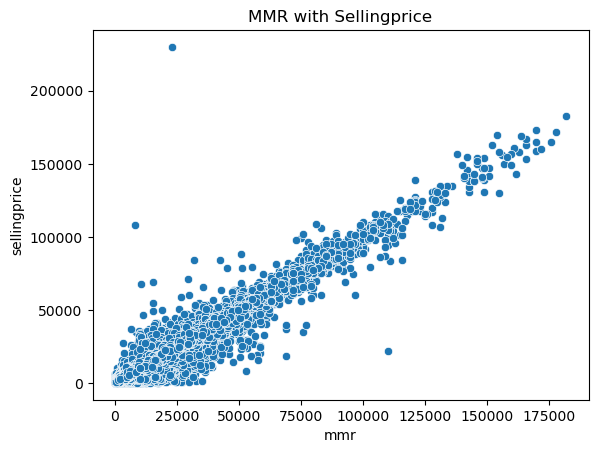

In [ ]:
sns.scatterplot(df, x = 'mmr', y = 'sellingprice')
plt.title('MMR with Sellingprice')
plt.show()

### **Feature Engineering**

In [ ]:
df.head(3)

,year,make,model,trim,body,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_Day,sale_Date,sale_Month,sale_year,sale_time
0,2015,Kia,Sorento,LX,suv,ca,5,16639,white,black,kia motors america inc,20500.0,21500.0,Tue,16,Dec,2014,12:30:00
1,2015,Kia,Sorento,LX,suv,ca,5,9393,white,beige,kia motors america inc,20800.0,21500.0,Tue,16,Dec,2014,12:30:00
2,2014,BMW,3 Series,328i SULEV,sedan,ca,45,1331,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu,15,Jan,2015,04:30:00


In [ ]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'state', 'condition',
       'odometer', 'color', 'interior', 'seller', 'mmr', 'sellingprice',
       'sale_Day', 'sale_Date', 'sale_Month', 'sale_year', 'sale_time'],
      dtype='object')

##### We only know the sale day, date, month, year after we sales the car, so these data will not be put into machine learning

In [ ]:
df = df.drop(columns=['sale_Day', 'sale_Date', 'sale_Month', 'sale_year', 'sale_time'])

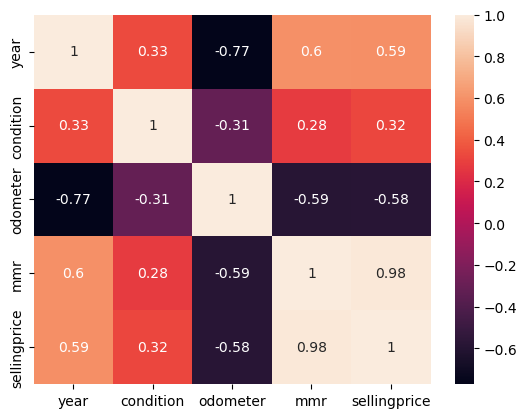

In [ ]:
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot = True)
plt.show()

##### Use **Heatmap** to show the numerical value correlation with **sellingprice**, None of them close to **0** so I will remain them all

### **Machine Learning**

#### **K-Means**

In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [32]:
normalize = MinMaxScaler()
standard = StandardScaler()

select_features = ['sellingprice', 'condition', 'odometer', 'year']
X = df[select_features]

X_norm = normalize.fit_transform(X)
X_stand = standard.fit_transform(X_norm)

In [ ]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_stand)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

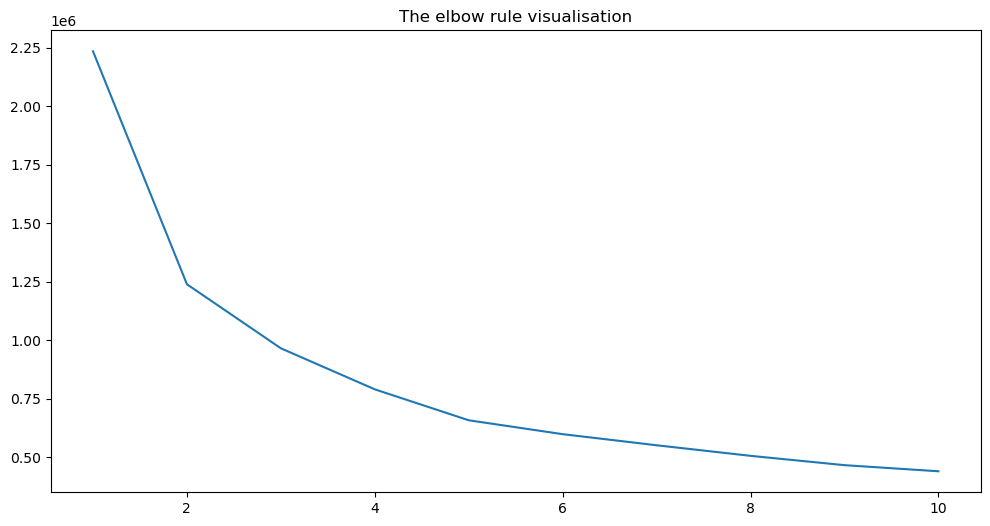

In [ ]:
plt.figure(figsize=(12,6))    
plt.title("The elbow rule visualisation")
plt.plot(range(1, 11), wcss)
plt.show()

In [33]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_stand)

In [34]:
clean_data = df.copy()
clean_data['Cluster'] = y_kmeans + 1

In [35]:
clean_data.head(3)

,year,make,model,trim,body,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_Day,sale_Date,sale_Month,sale_year,sale_time,Cluster
0,2015,kia,Sorento,lx,suv,ca,5,16639,white,black,kia motors america inc,20500.0,21500.0,Tue,16,Dec,2014,12:30:00,2
1,2015,kia,Sorento,lx,suv,ca,5,9393,white,beige,kia motors america inc,20800.0,21500.0,Tue,16,Dec,2014,12:30:00,2
2,2014,bmw,3 Series,328i sulev,sedan,ca,45,1331,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu,15,Jan,2015,04:30:00,2


In [36]:
clean_data['Cluster'].value_counts()

Cluster
2    366605
1    181539
Name: count, dtype: int64

In [ ]:
def cluster_plot(feature):    
    plt.figure(figsize=(16,5))
    plt.title(f'{feature} by cluster')
    ax = sns.boxplot(data=clean_data, x='Cluster', y=feature, showfliers=False)
    plt.show()

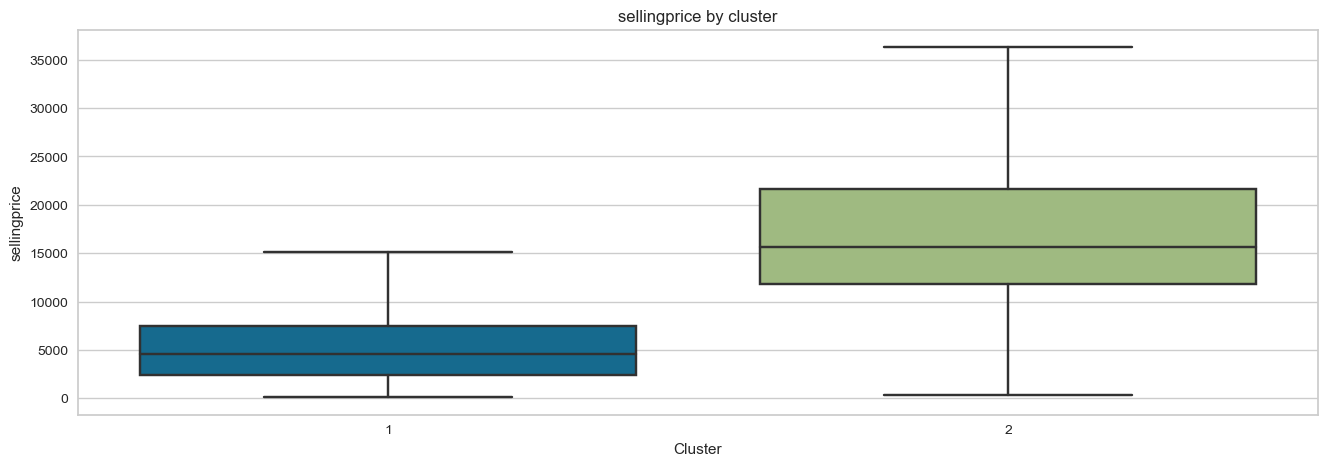

In [ ]:
cluster_plot('sellingprice')

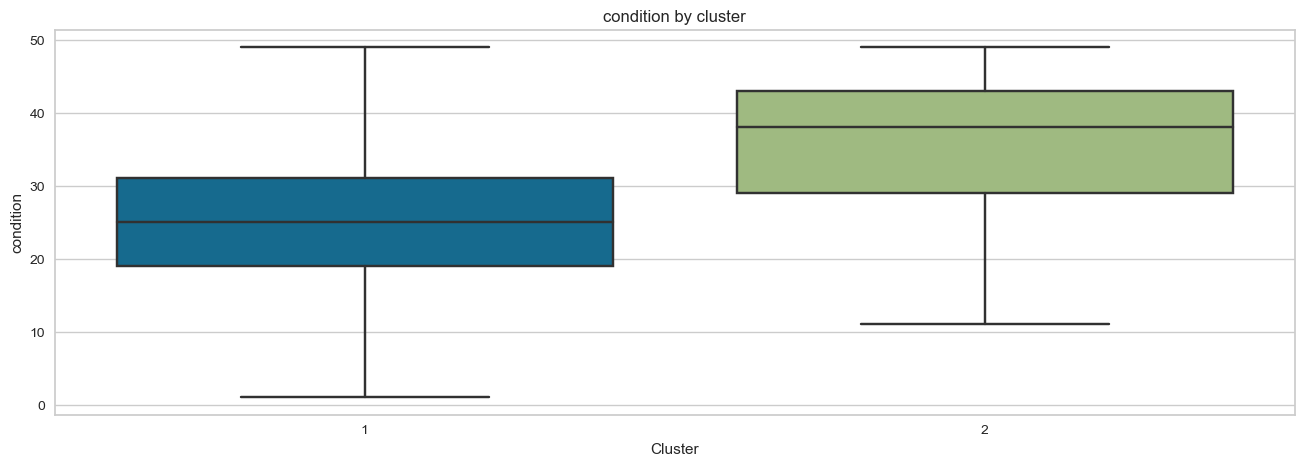

In [ ]:
cluster_plot('condition')

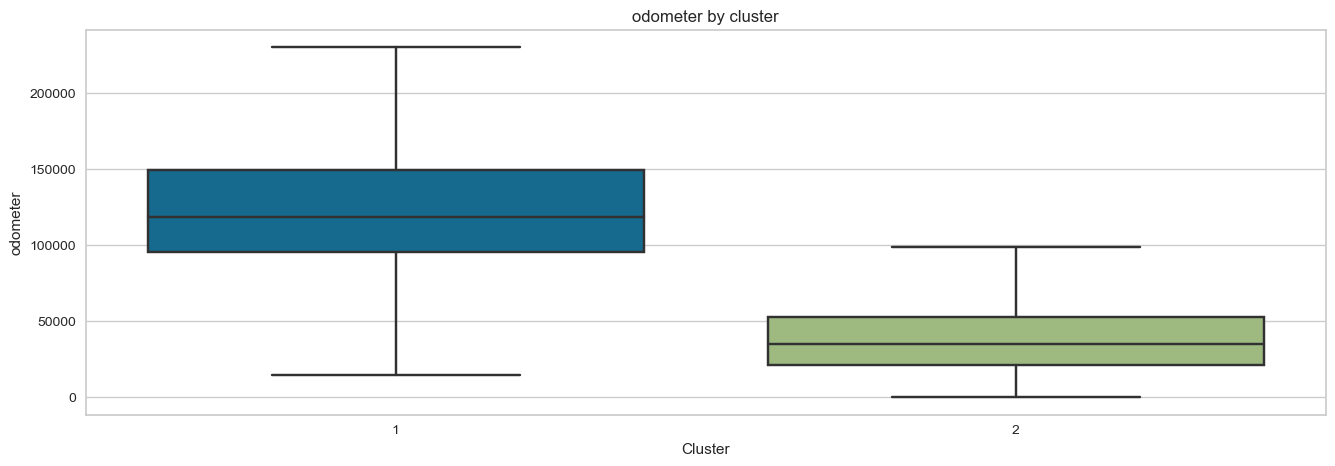

In [ ]:
cluster_plot('odometer')

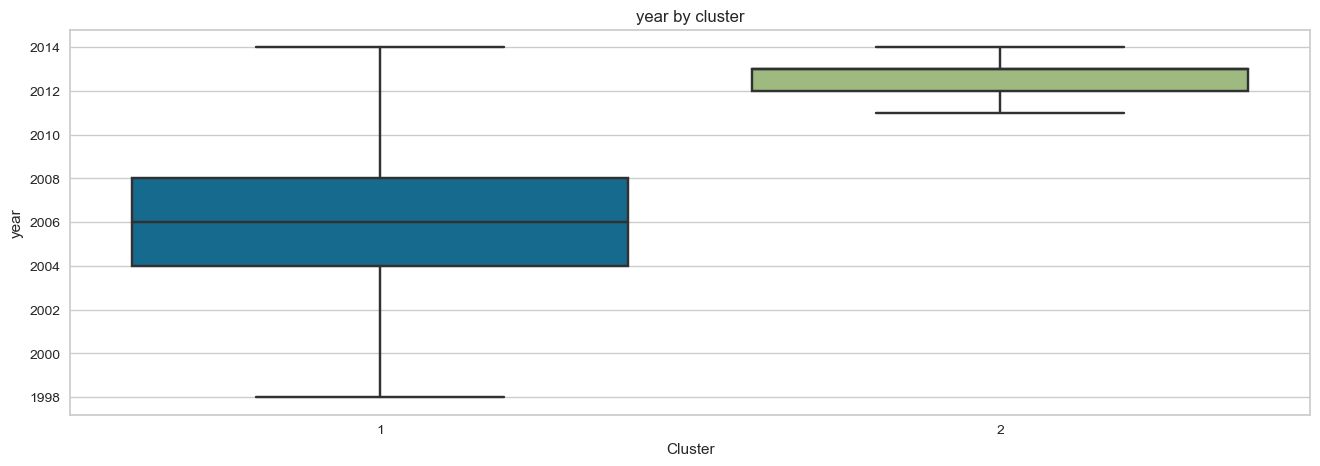

In [ ]:
cluster_plot('year')

In [231]:
def Cluster_plot(feature):
    top_makes_by_cluster = clean_data.groupby(['Cluster', feature]).size().reset_index(name='count').sort_values(['Cluster', 'count'], ascending=[True, False])
    top_10_makes_by_cluster = top_makes_by_cluster.groupby('Cluster').head(10)
    clusters = [1,2]
    max_count = top_10_makes_by_cluster['count'].max()
    
    for cluster in clusters:
        plt.figure(figsize=(10, 6))
        cluster_data = top_10_makes_by_cluster[top_10_makes_by_cluster['Cluster'] == cluster]
        plt.bar(cluster_data[feature], cluster_data['count'])
        plt.title(f'Top 10 Buying {feature} in Cluster {cluster}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')

        plt.ylim(0, max_count + (0.1 * max_count))
        plt.xticks(rotation=45)
        plt.show()


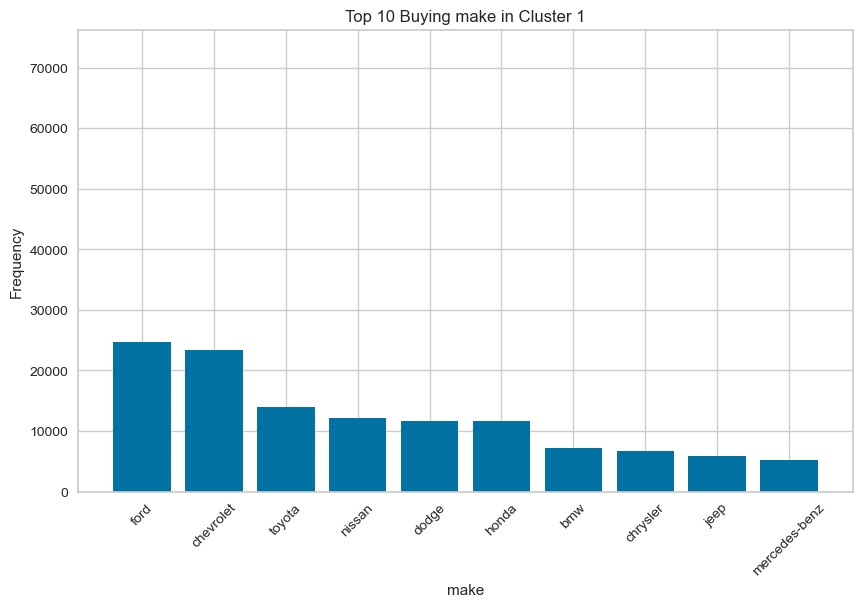

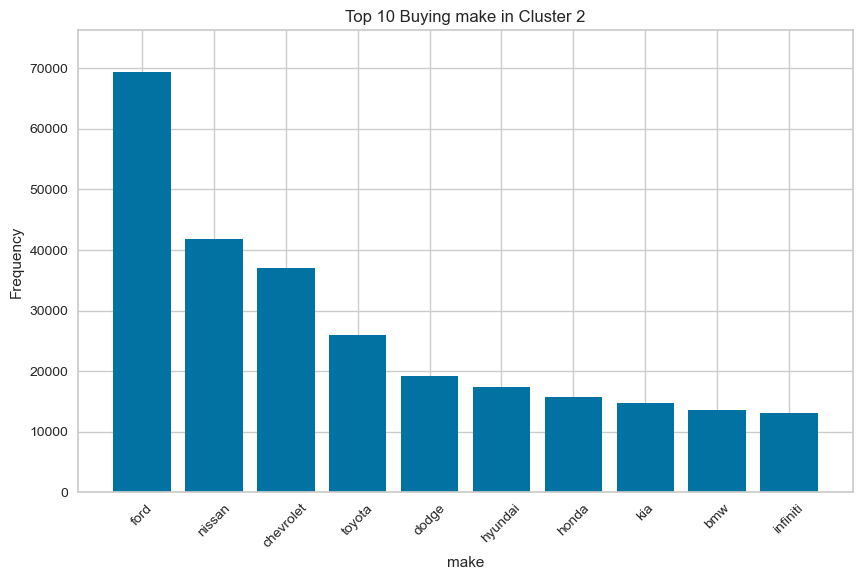

In [232]:
Cluster_plot('make')

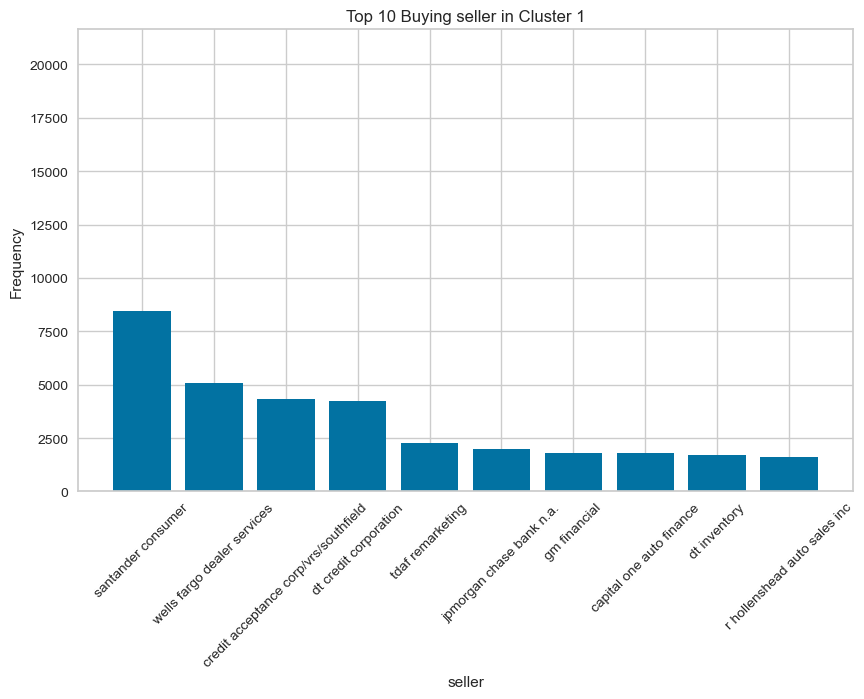

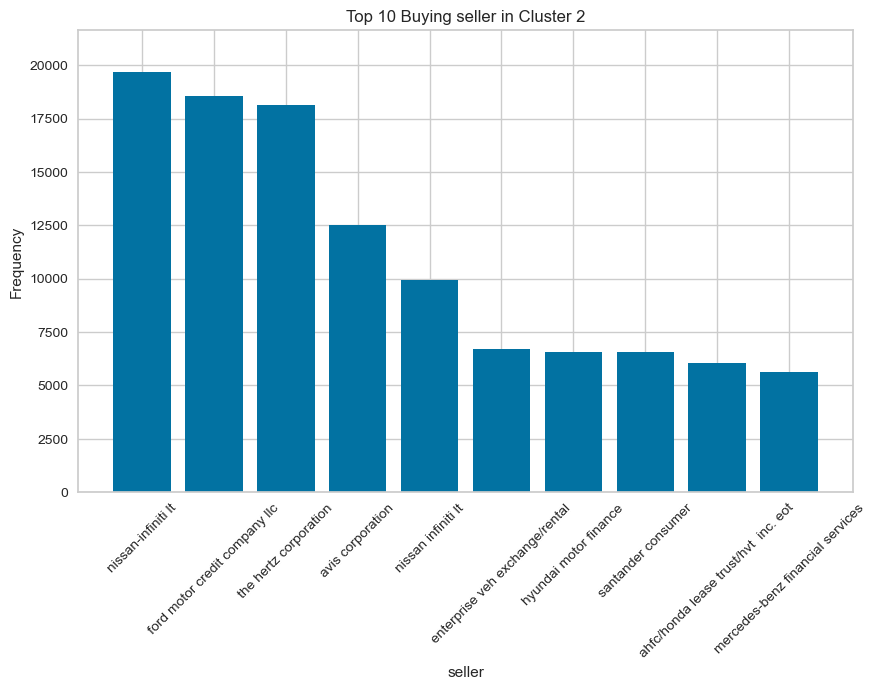

In [233]:
Cluster_plot('seller')

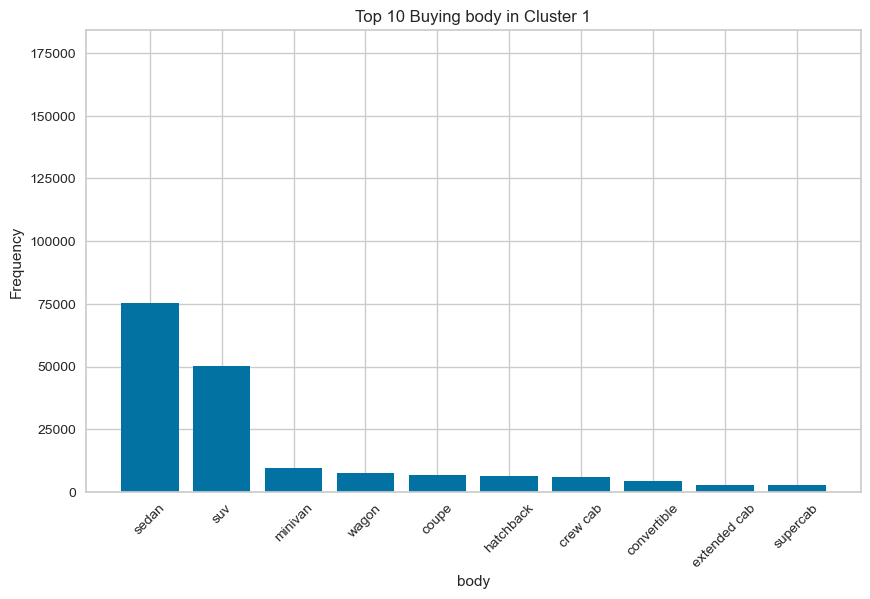

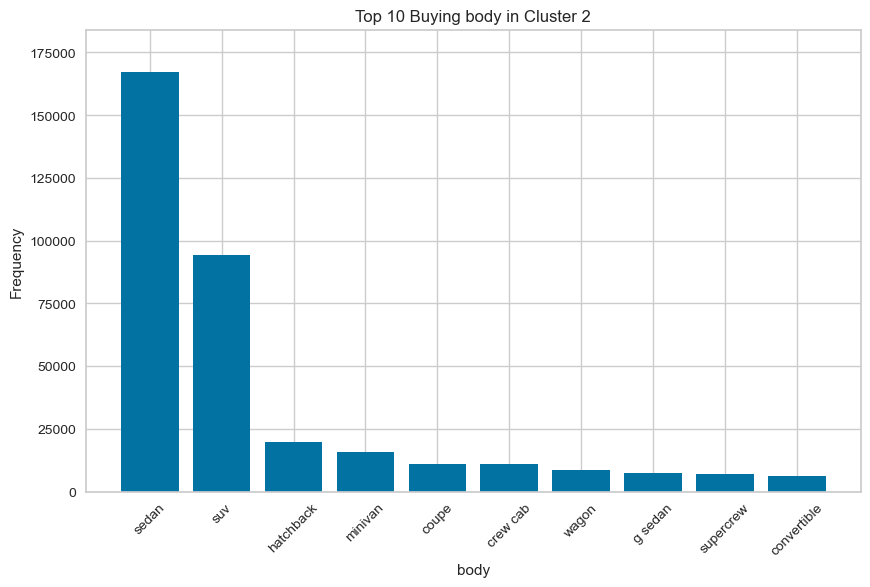

In [234]:
Cluster_plot('body')

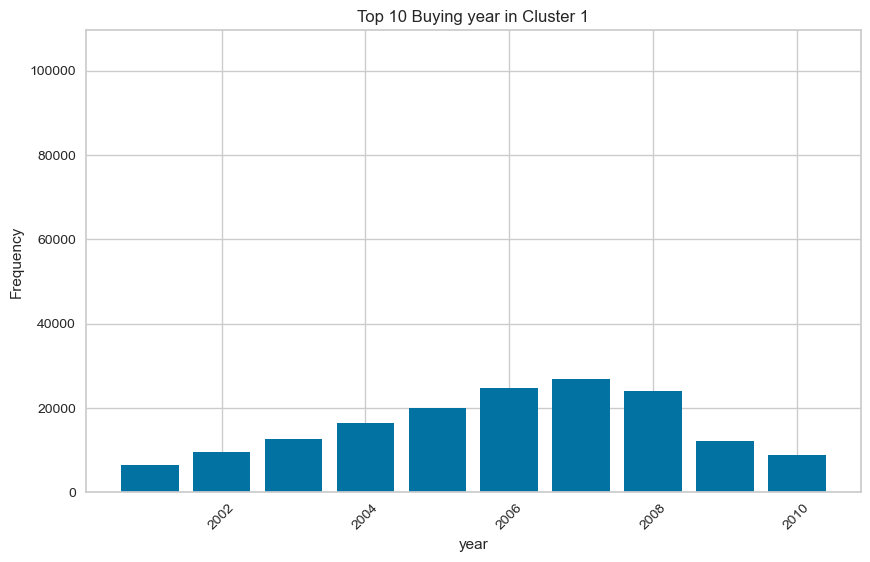

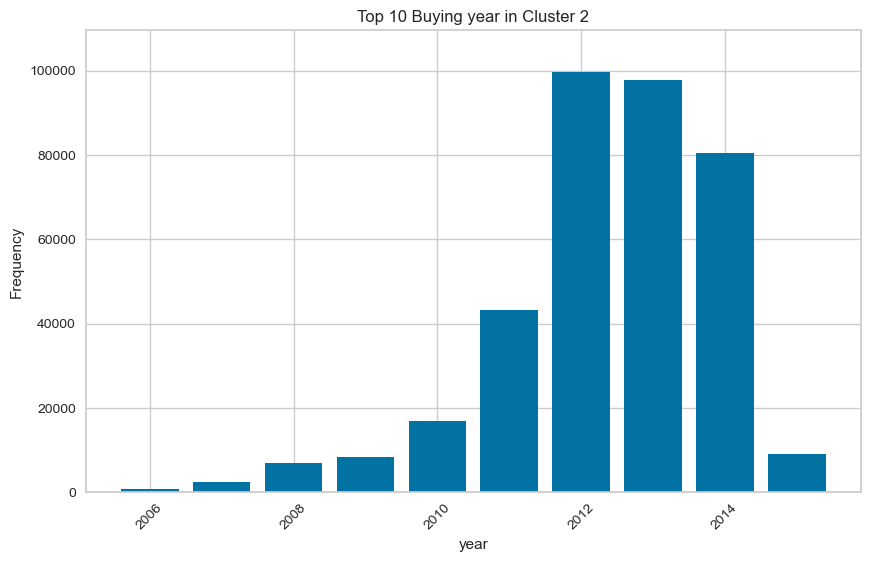

In [235]:
Cluster_plot('year')

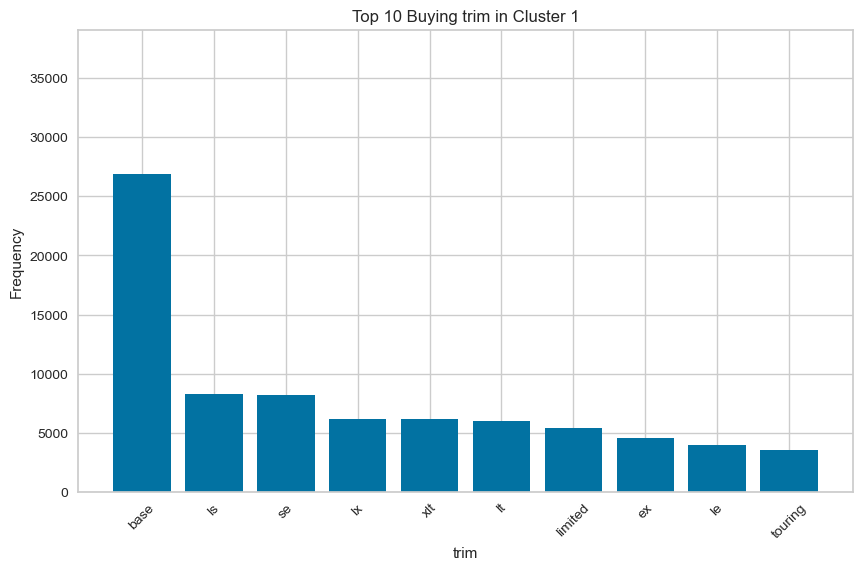

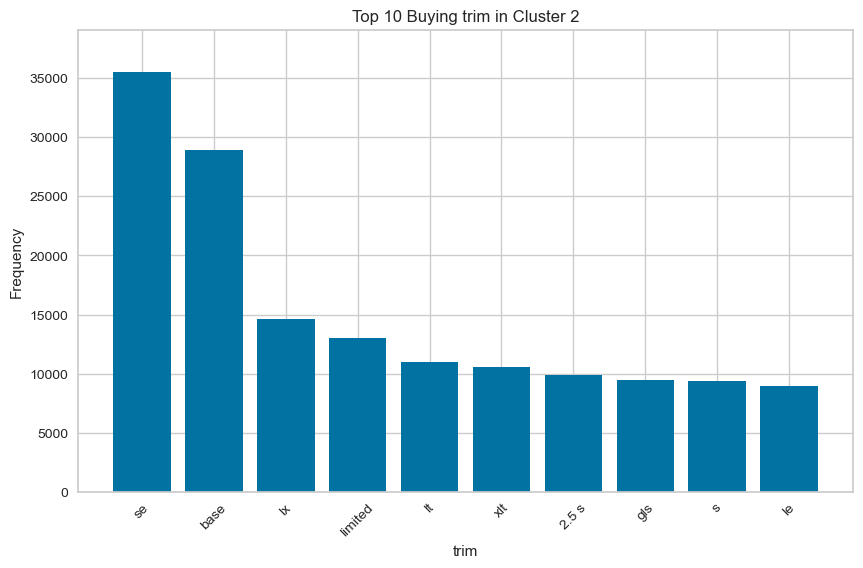

In [236]:
Cluster_plot('trim')

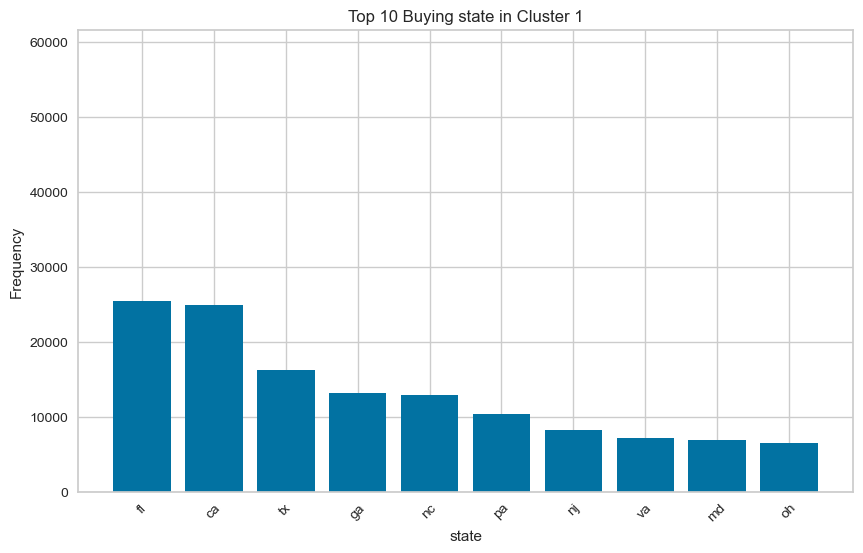

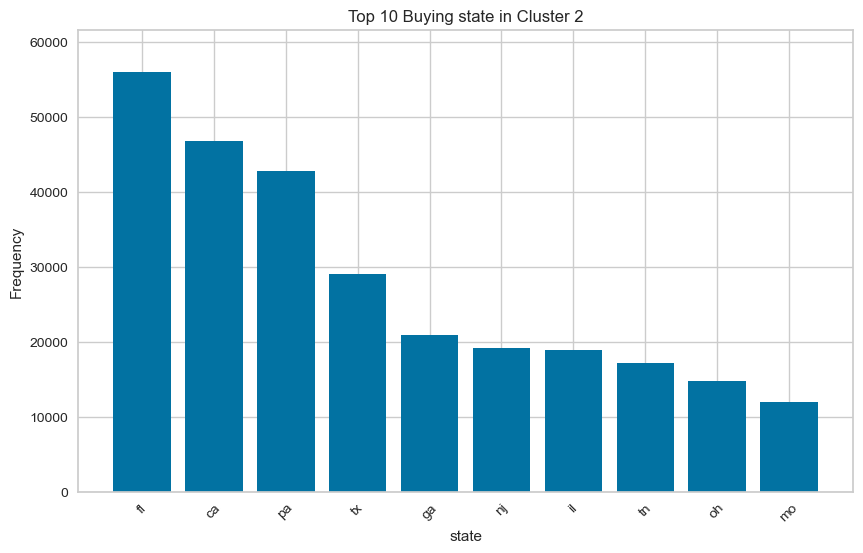

In [237]:
Cluster_plot('state')

### Customer Segmentation Based on Car Purchases
#### Cluster 1: Budget-Conscious Buyers

#### Spending Habits: Buyers in this cluster tend to spend less money on car purchases.

#### **Preferences**:
##### High Odometer Readings: They are more likely to buy cars with higher mileage, indicating significant use.

##### Older Car Models: Preference leans towards older versions of cars, suggesting a priority on price over the latest features.

##### Condition: The condition of the cars they purchase typically ranges between 20 to 30, on a scale where higher numbers indicate better condition. This suggests a willingness to accept cars in less-than-optimal condition, likely in exchange for lower prices.

#### Cluster 2: Quality and Newness Seekers

##### Spending Habits: This group of buyers is willing to invest more money into their car purchases.

##### **Preferences**:

##### Recent Models: They prefer purchasing cars that were produced in recent years, indicating a desire for newer models with the latest features and technologies.

##### Low Odometer Readings: Cars with low mileage are preferred, often appearing almost new. This suggests a value placed on vehicles that have undergone minimal wear and tear.

##### Condition: The implied condition of these vehicles is significantly higher than those preferred by Cluster 1, underscoring a prioritization of quality and newness in their car-buying decisions.

## Build predict sellingprice model

### **Train, Test Split**

In [47]:
from sklearn.model_selection import train_test_split

formula_data = data.drop(columns=['vin','transmission', 'saledate'])

formula_data['body'] = formula_data['body'].apply(lambda x: str(x).lower() if pd.notnull(x) else x)
formula_data['make'] = formula_data['make'].apply(lambda x: str(x).lower() if pd.notnull(x) else x)
formula_data['trim'] = formula_data['trim'].apply(lambda x: str(x).lower() if pd.notnull(x) else x)

formula_data = formula_data.loc[formula_data['sellingprice'] != 1]

train, test = train_test_split(formula_data, test_size = 0.2, random_state = 42)

print(train.shape)
print(test.shape)

(447066, 13)
(111767, 13)


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

In [49]:
class CustomMissingValueImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoder = LabelEncoder()
        self.one_encode = OneHotEncoder(handle_unknown='ignore')
        self.models = {}

    def fit(self, X, y=None):
        features_list = ['make', 'trim', 'body', 'model']
        null_counts = X[features_list].isnull().sum(axis=1)
        X = X[null_counts < 2]

        for feature in features_list:
            df_notnull = X.dropna(subset=[feature])
            if not df_notnull.empty:
                X_features = self.one_encode.fit_transform(df_notnull[features_list])
                y_feature = self.encoder.fit_transform(df_notnull[feature])

                clf = RandomForestClassifier()
                clf.fit(X_features, y_feature)
                self.models[feature] = (clf, self.one_encode, self.encoder)
        return self

    def transform(self, X, y=None):
        X = X.copy()  # Avoid modifying the original dataframe
        X[['condition', 'odometer']] = X[['condition', 'odometer']].apply(lambda x: x.fillna(x.mean()).astype(int))
        X[['color', 'interior']] = X[['color', 'interior']].apply(lambda x: x.fillna(x.mode().iloc[0]))

        features_list = ['make', 'trim', 'body', 'model']
        null_counts = X[features_list].isnull().sum(axis=1)
        X = X[null_counts < 2]
        for feature in features_list:
            df_null = X[X[feature].isnull()]
            if not df_null.empty and feature in self.models:
                clf, one_encode, encoder = self.models[feature]
                try:
                    X_features = one_encode.transform(df_null[features_list])
                    predicted_labels = encoder.inverse_transform(clf.predict(X_features))
                    X.loc[X[feature].isnull(), feature] = predicted_labels
                except ValueError as e:  
                    print(f"Error for {feature}: {e}")
                    
                    X = X.drop(df_null.index)

        return X.dropna()


In [50]:
# Initialize your custom imputer
custom_imputer = CustomMissingValueImputer()

# Fit the imputer on the training data
custom_imputer.fit(train)

# Transform both training and test data
train_data_transformed = custom_imputer.transform(train)
test_data_transformed = custom_imputer.transform(test)


Error for body: X has 2897 features, but RandomForestClassifier is expecting 2352 features as input.
Error for body: X has 2897 features, but RandomForestClassifier is expecting 2352 features as input.


#### **Label_encoding**


In [80]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, target='sellingprice'):
        self.target = target
        self.encoding_dicts = {} 

    def fit(self, X, y=None):
        categorical_features = X.select_dtypes(include=['object', 'category']).columns
        
        for feature in categorical_features:
            make_ind = X[[feature, self.target]].groupby(feature).mean().sort_values(by=self.target).index
            encoded_dict = {value: key for key, value in enumerate(make_ind)}
            
            self.encoding_dicts[feature] = encoded_dict
            
        return self

    def transform(self, X, y=None):
        X_trans = X.copy()

        for feature, encoding_dict in self.encoding_dicts.items():
            
            X_trans[feature + '_transform'] = X[feature].map(lambda x: encoding_dict.get(x, 0)).fillna(0).astype(int)
        
        X_trans.drop(columns=list(self.encoding_dicts.keys()), inplace=True)
        
        for col in X_trans.columns:
            X_trans[col] = X_trans[col].astype(int)
        
        return X_trans

In [ ]:
encoder = FeatureEncoder(target='sellingprice')
X_train_encoded = encoder.fit_transform(train_data_transformed)
X_test_encoded = encoder.transform(test_data_transformed)

#### **Regression**

In [61]:
y_train = X_train_encoded['sellingprice']
X_train = X_train_encoded.drop(columns='sellingprice')

In [62]:
y_test = X_test_encoded['sellingprice']
X_test = X_test_encoded.drop(columns='sellingprice')

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_validate

In [64]:
scorings = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']

In [65]:
models = {
    'Linear_model': LinearRegression(),
    'RF_model':RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18),    
    'GBR_model':GradientBoostingRegressor(n_estimators=300, random_state=18),
    'XGR_model':xgb.XGBRegressor(n_estimators = 300, random_state = 18)
}

In [66]:
def get_score(model_name, model, Xtrain, ytrain):
    scores = cross_validate(model, Xtrain, ytrain, scoring=scorings)
    print(model_name)
    print('Fit_time:', scores['fit_time'].mean())
    print('R2:', scores['test_r2'].mean())
    print('MAE:', abs(scores['test_neg_mean_absolute_error'].mean()))
    print('MSE:', abs(scores['test_neg_mean_squared_error'].mean()))
    return print('============================================================================================================================================')

In [304]:
for name, model in models.items():
    get_score(name, model, X_train, y_train)

Linear_model
Fit_time: 0.10226678848266602
R2: 0.9709678630967108
MAE: 1038.1857650706156
MSE: 2723142.7292424627
RF_model
Fit_time: 34.405466365814206
R2: 0.918730502124961
MAE: 1666.4983888762322
MSE: 7624699.567504125
GBR_model
Fit_time: 115.9079011440277
R2: 0.9769384054518339
MAE: 909.7415294614899
MSE: 2163085.57740191
XGR_model
Fit_time: 1.5751790523529052
R2: 0.9735219138595956
MAE: 891.3794217631823
MSE: 2483985.586603426


#### **I will choose XGB Regression**
#### Although Gradient Boosting Regressor perform Best. 
#### **But XGB Reression spent less time and only loss a little bit accuracy**

### **Feature Selecting**

In [67]:
X_train_v1, X_val_v1, y_train_v1, y_val_v1 = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [68]:
from boruta import BorutaPy

In [69]:
xgr = xgb.XGBRegressor(n_estimators = 300, random_state = 18)

boruta_selector = BorutaPy(xgr, n_estimators='auto',random_state=42, verbose=2)
boruta_selector.fit(X_train_v1.values, y_train_v1.values.ravel())

sel_X_train_v1 = boruta_selector.transform(np.array(X_train_v1))
sel_X_test_v1 = boruta_selector.transform(np.array(X_val_v1))

xgr.fit(sel_X_train_v1, y_train_v1)

boruta_preds = xgr.predict(sel_X_test_v1)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	4
Iteration:

In [70]:
boruta_r2_score = round(r2_score(y_val_v1, boruta_preds), 3)
boruta_selected_features_mask = boruta_selector.support_
boruta_selected_features = X_train_v1.columns[boruta_selected_features_mask]
print(boruta_r2_score)
boruta_selected_features

0.972


Index(['year', 'condition', 'mmr', 'make_transform', 'model_transform'], dtype='object')

In [74]:
for name, model in models.items():
    get_score(name, model, X_train[boruta_selected_features], y_train)

Linear_model
Fit_time: 0.04984650611877441
R2: 0.9700286046331923
MAE: 1052.875972371595
MSE: 2840360.7906850493
RF_model
Fit_time: 22.781840991973876
R2: 0.9479456653973187
MAE: 1373.3981002046667
MSE: 4934264.697599502
GBR_model
Fit_time: 48.28722243309021
R2: 0.9751763159284004
MAE: 949.4756391693351
MSE: 2352467.7593090795
XGR_model
Fit_time: 1.2903809070587158
R2: 0.9692611262305242
MAE: 970.5967929593508
MSE: 2913540.3389965175


#### Let try RFE (Recursive feature elimination)

In [75]:
X_train_v2, X_val_v2, y_train_v2, y_val_v2 = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [76]:
from sklearn.feature_selection import RFE
xgr = xgb.XGBRFRegressor()
rfe_r2_score_list = []
mean_squared_error_list = []

for k in range(1, 11):
    RFE_selector = RFE(estimator=xgr, n_features_to_select=k, step=1)
    RFE_selector.fit(X_train_v2, y_train_v2)
    
    sel_X_train_v2 = RFE_selector.transform(X_train_v2)
    sel_X_test_v2 = RFE_selector.transform(X_val_v2)
    
    xgr.fit(sel_X_train_v2, y_train_v2)
    RFE_preds = xgr.predict(sel_X_test_v2)
    
    r2_score_rfe = round(r2_score(y_val_v2, RFE_preds), 3)
    mean_squared_error_rfe = round(mean_squared_error(y_val_v2, RFE_preds), 3)
    
    rfe_r2_score_list.append(r2_score_rfe)
    mean_squared_error_list.append(mean_squared_error_rfe)

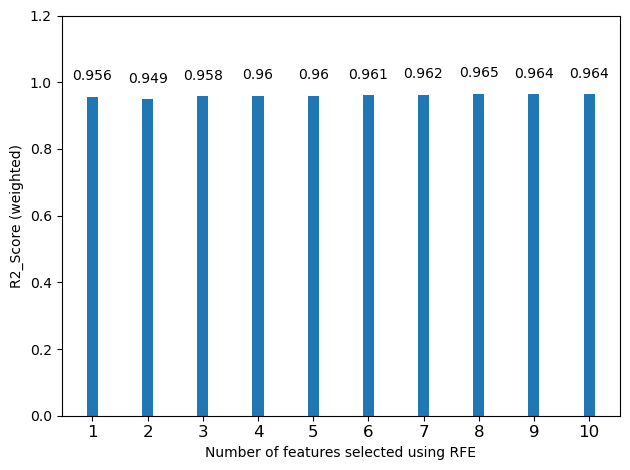

In [77]:
fig, ax = plt.subplots()

x = np.arange(1, 11)
y = rfe_r2_score_list

ax.bar(x, y, width=0.2)
ax.set_xlabel('Number of features selected using RFE')
ax.set_ylabel('R2_Score (weighted)')
ax.set_ylim(0, 1.2)
ax.set_xticks(np.arange(1, 11))
ax.set_xticklabels(np.arange(1, 11), fontsize=12)

for i, v in enumerate(y):
    plt.text(x=i+1, y=v+0.05, s=str(v), ha='center')
    
plt.tight_layout()

In [78]:
RFE_selector = RFE(estimator=xgr, n_features_to_select=8, step=10)
RFE_selector.fit(X_train_v2, y_train_v2)

RFE_selected_features_mask = RFE_selector.get_support()

In [79]:
RFE_selected_features = X_train_v2.columns[RFE_selected_features_mask]
RFE_selected_features

Index(['year', 'condition', 'odometer', 'mmr', 'make_transform',
       'model_transform', 'trim_transform', 'seller_transform'],
      dtype='object')

In [104]:
for name, model in models.items():
    get_score(name, model, X_train[RFE_selected_features], y_train)

Linear_model
Fit_time: 0.08870058059692383
R2: 0.9707447275161559
MAE: 1043.0176510748975
MSE: 2772507.5120725348
RF_model
Fit_time: 30.06769642829895
R2: 0.9193999669975437
MAE: 1690.8742587109386
MSE: 7640390.631477162
GBR_model
Fit_time: 102.56340770721435
R2: 0.9764135350292389
MAE: 925.7432401968927
MSE: 2235325.626940318
XGR_model
Fit_time: 1.4967890739440919
R2: 0.9725961505208975
MAE: 922.4974428655876
MSE: 2597352.959087577


In [83]:
xgr = xgb.XGBRegressor(n_estimators = 300, random_state = 18)

In [100]:
def test_score(features, xtrain, ytrain, xtest, ytest):
    xgr.fit(xtrain, ytrain)
    y_pred = xgr.predict(xtest)
    print('features: ', features)
    print('r2: ', r2_score(ytest, y_pred))
    print('MAE', mean_absolute_error(y_test, y_pred))
    print('MSE: ', mean_squared_error(y_test, y_pred))

### Test val

In [103]:
test_score('Boruta', X_train[boruta_selected_features], y_train, X_test[boruta_selected_features], y_test)
test_score('RFR', X_train[RFE_selected_features], y_train, X_test[RFE_selected_features], y_test)
test_score('Original', X_train, y_train, X_test, y_test)

features:  Boruta
r2:  0.9684569663334904
MAE 972.6682350808792
MSE:  2957718.2968390905
features:  RFR
r2:  0.9710461771291509
MAE 935.3594962981044
MSE:  2714933.9081951636
features:  Original
r2:  0.9716985665002857
MAE 914.1355586493806
MSE:  2653760.845386131


### **Tuning Hyperparameters**

#### So now we are going to tuning the XGBoostRegressor hyper parameters

In [337]:
from sklearn.model_selection import RandomizedSearchCV

In [338]:
param_grid = {
    'learning_rate': np.linspace(0.01,2,20),
    'min_child_weight':range(1,9,1),
    'max_depth': range(2,12,1)
}

In [339]:
xgr = xgb.XGBRegressor(n_estimators = 300, random_state = 18)

In [349]:
random_search = RandomizedSearchCV(xgr, param_grid, cv=5, scoring='neg_mean_absolute_error',n_iter=300,n_jobs = 1)

In [350]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                   n_iter=300, n_jobs=1,
                   param_distributions={'learning_rate': array([0.01      , 0.11473684, 0.21947368, 0.32421053, 0.42894737,
       0.53368421, 0.63842105, 0.74315789, 0.84789474, 0.95263158,
       1.05736842, 1.16210526, 1.26684211, 1.37157895, 1.47631579,
       1.58105263, 1.68578947, 1.79052632, 1.89526316, 2.        ]),
                                        'max_depth': range(2, 12),
                                        'min_child_weight': range(1, 9)},
                   scoring='neg_mean_absolute_error')

In [351]:
print("Best Hyperparameters:", random_search.best_params_)
print("Best Estimator:", random_search.best_estimator_)

Best Hyperparameters: {'min_child_weight': 2, 'max_depth': 9, 'learning_rate': 0.11473684210526315}
Best Estimator: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.11473684210526315,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=18, ...)


In [352]:
xgr = random_search.best_estimator_

In [353]:
xgr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.11473684210526315,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=18, ...)

In [354]:
y_pred = xgr.predict(X_test)

In [355]:
print('R2: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))

R2:  0.9727232440621025
MAE:  894.5627498992801


#### **The origin**
##### R2:  0.9696293347701878
##### MAE 941.9757092453124

In [110]:
import shap

# print the JS visualization code to the notebook
shap.initjs()

In [111]:
explainer = shap.TreeExplainer(xgr)
shap_values = explainer.shap_values(X_test)

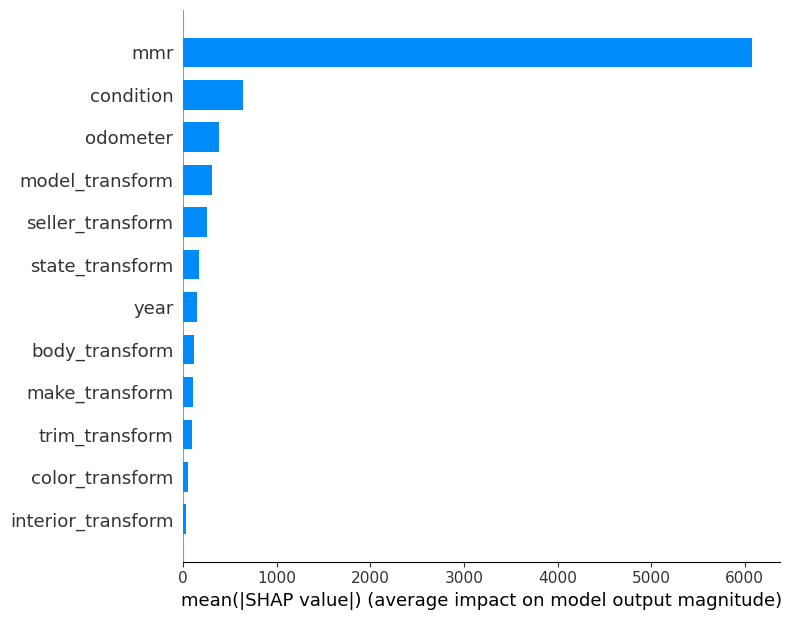

In [112]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [115]:
shap.force_plot(
    explainer.expected_value, shap_values[:1000, :], X_test.iloc[:1000, :]
)

In [ ]:
import plotly.express as px
feature_importance = xgr.get_booster().get_score(importance_type='gain')
features = list(feature_importance.keys())
importances = list(feature_importance.values())
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending=True)
fig = px.bar(feature_importance_df, x='Importance', y='Feature', orientation='h',
             title='Feature Importance (Gain)',
             labels={'Feature': 'Feature', 'Importance': 'Importance'},
             height=600, width=800)
fig.show()

### Tableau Visualization

In [ ]:
# https://public.tableau.com/views/VehicleAnalysis_17107878820960/2?:language=zh-TW&publish=yes&:sid=&:display_count=n&:origin=viz_share_link

## Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.2, random_state = 42)

In [ ]:
def feat_eng(df):
    df = df.loc[df['sellingprice'] != 1]
    df['body'] = df['body'].apply(lambda x: str(x).lower() if pd.notnull(x) else x)

    df[['condition', 'odometer']] = df[['condition', 'odometer']].apply(lambda x: x.fillna(x.mean()).astype(int))
    df[['color', 'interior']] = df[['color', 'interior']].apply(lambda x: x.fillna(x.mode().iloc[0]))

    return df

In [ ]:
class fill_missing():

    def __init__(self):
        self.clf = RandomForestClassifier(random_state=42)
        self.encoder = LabelEncoder()
        self.one_encoder = OneHotEncoder(handle_unknown='ignore')

    def encode_train(self, train):

        for i in range(4):
            features_list = ['make','trim','body','model']
            pop_feature = features_list.pop(i)

            df_notnull = train.dropna(subset=[pop_feature])
            df_null = train[train[pop_feature].isnull()]
            
            X = self.one_encoder.fit_transform(df_notnull[features_list])
            y = self.encoder.fit_transform(df_notnull[pop_feature])

            self.clf.fit(X, y)

            predicted_make = self.clf.predict(self.one_encoder.transform(df_null[features_list]))

            predicted_make_labels = self.encoder.inverse_transform(predicted_make)

            train.loc[train[pop_feature].isnull(), pop_feature] = predicted_make_labels
            
        return self
    
    def test_encode(self, input_data):

        for i in range(4):
            features_list = ['make','trim','body','model']
            pop_feature = features_list.pop(i)

            input_data_null = input_data[input_data[pop_feature].isnull()]

            if not input_data_null.empty:

                input_data_X = self.one_encoder.transform(input_data[features_list].drop(pop_feature, axis=1))
                predicted_make = self.clf.predict(input_data_X)

                predicted_make_labels = self.encoder.inverse_transform(predicted_make)
                input_data.loc[input_data[pop_feature].isnull(), pop_feature] = predicted_make_labels
        return input_data


In [ ]:
class Label_encode(LabelEncoder, OneHotEncoder):
    def __init__(self):
        self.categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

    def encode_feature(data,feature):
        make_ind = data[[feature, 'sellingprice']].groupby(feature).mean().sort_values(by = 'sellingprice').index
        encoded_dic = {}

        for key, value in enumerate(make_ind):
            encoded_dic.update({value:key})

        return encoded_dic

    
    def train_test_trans(self, X_train, X_test):
        X_train_trans = X_train.copy()
        X_test_trans = X_test.copy()

        for feature in self.categorical_features:
            transform_dict = encode_feature(train, feature)

            X_train_trans[feature + '_transform'] = X_train[feature].map(transform_dict).astype(int)
            X_test_trans[feature + '_transform'] = X_test[feature].map(transform_dict).fillna(0).astype(int)
        
        X_train_trans.drop(columns = ['make', 'model', 'trim', 'body', 'color', 'interior', 'seller','state'], inplace=True)
        X_test_trans.drop(columns = ['make', 'model', 'trim', 'body', 'color', 'interior', 'seller','state'], inplace=True)

        for col in X_train_trans.columns:
            X_train_trans[col] = X_train_trans[col].astype(int)
            X_test_trans[col] = X_test_trans[col].astype(int)

        return X_train_trans, X_test_trans


In [ ]:
pipeline = Pipeline([
    ('Feature Engineering', FunctionTransformer(feat_eng)),
    ('Fill_missing_value', fill_missing())
])